In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, KDTree
from sklearn.preprocessing import StandardScaler
from ipywidgets import interact, IntSlider

In [4]:
data = load_iris()
X = data['data']
y = data['target']


In [5]:
Xt = StandardScaler().fit_transform(X)

In [6]:
def plot_neighbors (n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(Xt[:, 2:], y)
    X1, X2 = np.meshgrid(np.linspace(-2, 2), np.linspace(-2, 2))
    y_pred = knn.predict(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))))
    plt.contourf(X1, X2, y_pred.reshape(50, 50)/2, cmap='viridis', alpha=0.25, vmin=0, vmax=0.95)
    plt.scatter(*Xt[:, 2:].T, c=y, cmap='viridis');
    
interact(plot_neighbors, n_neighbors=IntSlider(min=1, max=36, step=2, description='neighbors'));



interactive(children=(IntSlider(value=1, description='neighbors', max=36, min=1, step=2), Output()), _dom_clas…

# knn bias and variance

In [45]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier(n_neighbors=2)

pipe = Pipeline([('scaler', StandardScaler()), ('clf', knn)])
pipe.fit(X_train, y_train)

param_grid = {'clf__n_neighbors': range(1, 36, 1)}
grid_search = GridSearchCV(pipe, param_grid, cv=20, n_jobs=2, iid=True)
grid_search.fit(X, y);

In [50]:
grid_search.best_params_.values()

dict_values([13])

In [47]:
grid_search.best_score_

0.9666666666666667

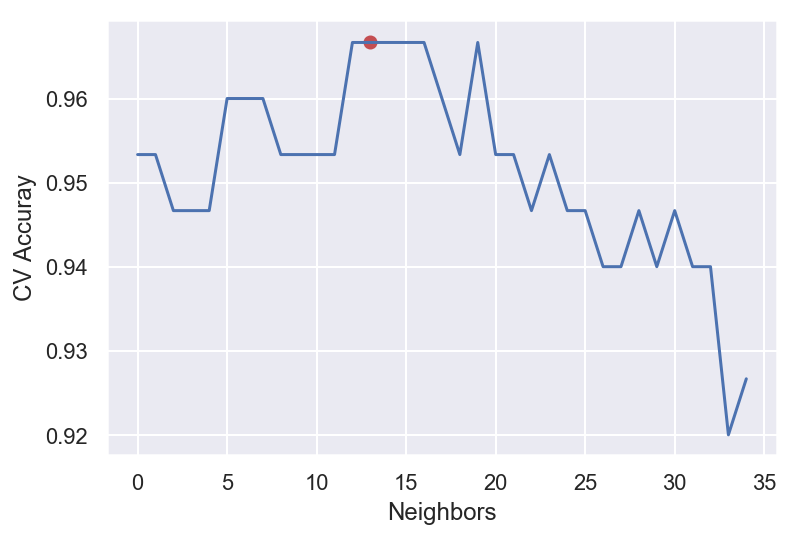

In [52]:
plt.plot(grid_search.cv_results_['mean_test_score'])
plt.xlabel('Neighbors')
plt.ylabel('CV Accuray');
plt.scatter(grid_search.best_params_.values(), grid_search.best_score_, c='r');

In [68]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

# KD Trees

In [82]:
from sklearn.neighbors import kd_tree, KDTree

In [83]:

KDTree?